# Credit Information Learning

## [Question 1] Confirmation of the content of the competition

In [1]:
#What to learn and what to predict**
# To predict how capable each applicant is of repaying a loan

#What kind of file to create and submit to Kaggle?**

# A file predicting the probability for the TARGET variable. And should contain a header of both SK_ID_CURR and TARGET


# What kind of index value will be used to evaluate the submissions?**

# Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection[8] in machine learning.

## [Question 2] Learning and verification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  int32  
 3   CODE_GENDER                  307511 non-null  int32  
 4   FLAG_OWN_CAR                 307511 non-null  int32  
 5   FLAG_OWN_REALTY              307511 non-null  int32  
 6  

0.5

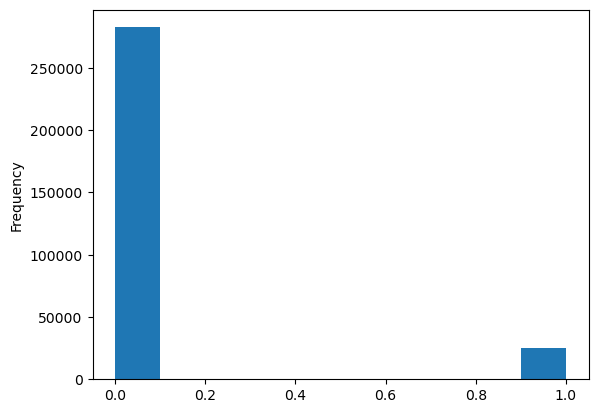

In [2]:


# importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset 
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')
df_train.shape, df_test.shape

df_train.head()

df_test.head()

"""# Basic analysis"""

# shape and size of train set
df_train.shape, df_train.size

# shape and size of test set
df_test.shape, df_test.size

# Display the stats about the train data
df_train.describe()



df_train.info()

# Display the stats about the test data
df_test.describe()

df_test.info()

"""# Preprocessing"""

# Examine the Distribution of the Target Column
df_train['TARGET'].value_counts()

"""The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category."""

df_train['TARGET'].plot.hist();

df_train[['DAYS_BIRTH']] = df_train[['DAYS_BIRTH']]/-365
df_train[['DAYS_REGISTRATION']] = df_train[['DAYS_REGISTRATION']]/-365
df_train[['DAYS_ID_PUBLISH']] = df_train[['DAYS_ID_PUBLISH']] / -365
df_train[['DAYS_LAST_PHONE_CHANGE']] = df_train[['DAYS_LAST_PHONE_CHANGE']] / -365



# Create an anomalous flag column
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

df_train.head()



# Total missing values in the train dataset
train_missing_val = df_train.isnull().sum().sort_values(ascending=False)
        
# Percentage of missing values
percent_missing = 100 * train_missing_val / len(df_train)
        
# Make a table with the results
missing_val_table = pd.concat([train_missing_val, percent_missing], axis=1)
        
# Rename the columns
missing_val_table = missing_val_table.rename(
  columns = {0 : 'Missing Values', 1 : 'percentage'}).round(1)

null_table = missing_val_table[missing_val_table.iloc[:, 1]>0]
null_table

# Total missing values n the test dataset
test_missing_val = df_test.isnull().sum().sort_values(ascending=False)
        
# Percentage of missing values
percent_missing = 100 * test_missing_val / len(df_train)
        
# Make a table with the results
missing_val_table = pd.concat([test_missing_val, percent_missing], axis=1)
        
# Rename the columns
missing_val_table = missing_val_table.rename(
  columns = {0 : 'Missing Values', 1 : 'percentage'}).round(1)

null_table1 = missing_val_table[missing_val_table.iloc[:, 1]>0]
null_table1

# Number of each type of column
df_train.dtypes.value_counts()
# object columns contain strings and are categorical features.

df_test.dtypes.value_counts()

# Number of unique classes in each object column
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

df_train.select_dtypes('object')



"""dropping missing values greater > 10"""

drop_null = null_table[null_table["percentage"] > 0.1].index
app_train =  df_train.drop(drop_null, axis=1)
miss_val = app_train.isnull().sum().sort_values(ascending=False)
miss_val[miss_val>0]

"""selecting object data types"""

df_train_objects = app_train.select_dtypes('object')
df_train_objects

# remaining columns with missing values
df_train_objects.isnull().sum()

# we need to drop the same columns in the the test dataset
app_test = df_test.drop(drop_null, axis=1)
miss_val = app_test.isnull().sum().sort_values(ascending=False)
miss_val[miss_val>0]

"""selecting object data types"""

df_test_object = app_test.select_dtypes('object')
df_test_object

# remaining columns with missing values
miss_val0 = df_test_object.isnull().sum()
missing_val0 = miss_val0[miss_val0>0]
missing_val0

# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_object = app_train.dtypes[app_train.dtypes == 'object'].index
train_object

for i in train_object:
    app_train[i] = le.fit_transform(app_train[i])
    app_test[i] = le.fit_transform(app_test[i])

app_train.info()

app_test.info()

#checking for missing values again
app_train.isna().sum()[app_train.isna().sum()>0]

app_train['CNT_FAM_MEMBERS'].describe()

app_test.isna().sum()[app_test.isna().sum()>0]

app_test[['AMT_ANNUITY']]

#data cleaning
train_col = app_train.columns
train_col

cols = train_col.drop('TARGET')

for i in cols:
    app_train[i] = app_train[i].fillna((app_train[i].mean()))
    app_test[i] = app_test[i].fillna((app_test[i].mean()))

app_train.head()

app_test.head()

# creating the x and y dataset
X = app_train.drop(['TARGET'], axis=1)
y = app_train[['TARGET']]
X.shape, y.shape

# split and standardize dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49)

# LEARNING AND ESTIMATING
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('prediction', y_pred_dt)
# Evaluation
roc_auc_score(y_test, y_pred_dt)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('prediction', y_pred_rf)
# Evaluation
roc_auc_score(y_test, y_pred_rf)

## [Problem 3] Estimation for test data

In [3]:

print('Train', app_train.shape)
print('Test ', app_test.shape)

test = scaler.fit_transform(app_test)

"""#### Predict using Decision Tree"""

y_pred_dt1 = dt.predict(test)

y_pred_dt1.shape

app_test['TARGET'] = y_pred_dt1

submit_1 = app_test.loc[:,('SK_ID_CURR', 'TARGET')]
submit_1.head()

submit_1.to_csv("submit_1.csv", index=False)




Train (307511, 59)
Test  (48744, 58)


## [Problem 4] Feature quantity engineering

In [5]:
# [Problem 4] Feature engineering



print(dt.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.DataFrame(dt.feature_importances_, index=X.columns)
feat_importances.head()

selected_feat = feat_importances.head(20).index
selected_feat

selected_feat

x1 = app_train[selected_feat[0:2]]
x2 = app_train[selected_feat[0:4]]
x3 = app_train[selected_feat[0:8]]
x4 = app_train[selected_feat[0:10]]
x5 = app_train[selected_feat[0:16]]
x6 = app_train[selected_feat[0:20]]
x7= app_train[selected_feat]



def feature(X, feature):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    
    roc_auc_score(y_test, y_pred)
    print(f'Roc score for {feature} is:{roc_auc_score(y_test, y_pred)}')

feature(x1, 'x1')

feature(x2, 'x2')

feature(x3, 'x3')

feature(x4, 'x4')

feature(x5, 'x5')

feature(x6, 'x6')

feature(x7, 'x7')

"""### Estimate for the most accurate features"""

# Align the training and testing data, keep only columns present in both dataframes
x5, app_test = x5.align(app_test, join = 'inner', axis = 1)

app_test.columns

test1 = scaler.fit_transform(app_test)

y = app_train[['TARGET']]

X5_train, X5_test, y_train, y_test = train_test_split(x5, y, test_size=0.25)

scaler = StandardScaler()
scaler.fit(X5_train)
X6_train = scaler.transform(X5_train)
X6_test = scaler.transform(X5_test)

dtr = DecisionTreeClassifier()
dtr.fit(X5_train, y_train)
y_pred1 = dtr.predict(test1)
y_pred1

sub = app_test[['SK_ID_CURR']]
sub['TARGET'] = y_pred1
submit_2 = sub

submit_2.to_csv("submit_2.csv", index=False)

"""<img src="submit_2.jpg"/>"""


[8.70425293e-02 2.05450611e-03 5.77369358e-03 5.83950961e-03
 7.86618160e-03 9.41393051e-03 5.32611570e-02 5.71720180e-02
 7.75315246e-02 4.22465981e-02 1.10606738e-02 1.04314302e-02
 1.64786525e-02 1.10521067e-02 5.57279140e-02 8.80080250e-02
 8.92244777e-02 8.33805373e-02 0.00000000e+00 1.60284627e-03
 7.91127715e-03 7.28809712e-04 8.32368473e-03 5.21354991e-03
 1.42311210e-02 5.08040638e-03 7.00086995e-03 2.87788187e-02
 4.71207717e-02 1.88105077e-03 2.25031550e-03 2.53603667e-03
 5.36763170e-03 6.75235380e-03 6.03922029e-03 4.24480737e-02
 7.48299443e-02 7.88171585e-05 3.88474286e-03 0.00000000e+00
 2.49784423e-03 2.01758142e-03 2.12881112e-05 3.10806232e-03
 8.87737052e-04 0.00000000e+00 5.56122911e-04 0.00000000e+00
 5.31836993e-04 3.77864693e-04 2.17839749e-04 1.26353696e-03
 9.67692023e-05 1.35506032e-03 3.04641282e-04 2.12285497e-04
 2.57386030e-04 6.68335465e-04]
Roc score for x1 is:0.4969072870349652
Roc score for x2 is:0.5037538623921549
Roc score for x3 is:0.51172357940827

'<img src="submit_2.jpg"/>'